# Quarante huit heures plus tard

Un modèle de propagation d'un virus en python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:

world_boundaries = np.array([[-100, 100],
                             [[-100, 100]]]) # kms
n_cities = 3
max_pop = 1000

populations = np.random.choice(max_pop, n_cities)
total_pop = populations.sum()

cities = pd.DataFrame(np.zeros((n_cities, 3)),
                      columns=['population', 'lat', 'long'])

cities['population'] = populations

people = pd.DataFrame(np.zeros((total_pop, 5)),
                      columns=('state', 'lat', 'long',
                               'north_speed', 'east_speed'))

people['state'] = 'sane'

city_centers = np.random.normal(scale=50, size=(n_cities, 2))


cities[['lat', 'long']] = city_centers

current = 0
for idx, city in cities.iterrows():
    pop = int(city['population'])
    positions = np.random.normal(scale=pop/200, size=(pop, 2))
    
    people.loc[current: pop+current-1,
               ['lat', 'long']] = positions + city[['lat', 'long']].values
    
    current = pop + current


In [65]:
people.head()

,state,lat,long,north_speed,east_speed
0,sane,-24.264673,-45.476949,0.0,0.0
1,sane,-24.261087,-51.107860,0.0,0.0
2,sane,-17.285099,-47.769487,0.0,0.0
3,sane,-27.516019,-49.266075,0.0,0.0
4,sane,-25.373912,-50.065846,0.0,0.0


In [66]:
cities

,population,lat,long
0,560,-22.779277,-49.462041
1,853,13.853625,2.263152
2,836,107.921021,-28.543714


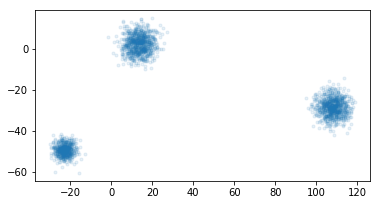

In [67]:
fig, ax = plt.subplots()
ax.plot(people.lat, people.long, '.', alpha=0.1)
ax.set_aspect('equal')

# Real world data

In [2]:
%%bash
curl https://www.google.org/flutrends/about/data/flu/fr/data.txt > ../data_sample/ggle_data.txt
head -n 12 ../data_sample/ggle_data.txt

Google Flu Trends - France
Copyright 2015 Google Inc.

Exported data may be used for any purpose, subject to the Google Terms of Service (http://www.google.com/accounts/TOS?hl=en_US).
If you choose to use the data, please attribute it to Google as follows: "Data Source: Google Flu Trends (http://www.google.org/flutrends)".

Each week begins on the Sunday (Pacific Time) indicated for the row.
Data for the current week will be updated each day until Saturday (Pacific Time).
Note: To open these files in a spreadsheet application, we recommend you save each text file as a CSV spreadsheet.
For more information, please visit http://www.google.org/flutrends

Date,France,Alsace,Aquitaine,Auvergne,Burgundy,Brittany,Centre,Champagne-Ardenne,Franche-Comte,Ile-de-France,Languedoc-Roussillon,Lorraine,Midi-Pyrenees,Nord-Pas-de-Calais,Normandy - Lower,Normandy - Upper,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Cote d'Azur,Rhône-Alpes


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42625    0 42625    0     0   112k      0 --:--:-- --:--:-- --:--:--  112k


In [3]:
ggle = pd.read_csv('../data_sample/ggle_data.txt',
                   skiprows=10, index_col=0)
# Note that you can magically do 
# ggle = pd.read_csv('https://www.google.org/flutrends/about/data/flu/fr/data.txt',
#                    skiprows=10, index_col=0)

ggle.index = pd.to_datetime(ggle.index, format='%Y-%m-%d')
ggle.head()

,France,Alsace,Aquitaine,Auvergne,Burgundy,Brittany,Centre,Champagne-Ardenne,Franche-Comte,Ile-de-France,...,Lorraine,Midi-Pyrenees,Nord-Pas-de-Calais,Normandy - Lower,Normandy - Upper,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Cote d'Azur,Rhône-Alpes
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-28,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-05,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-19,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-26,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


[Text(0,0.5,'Number of ')]

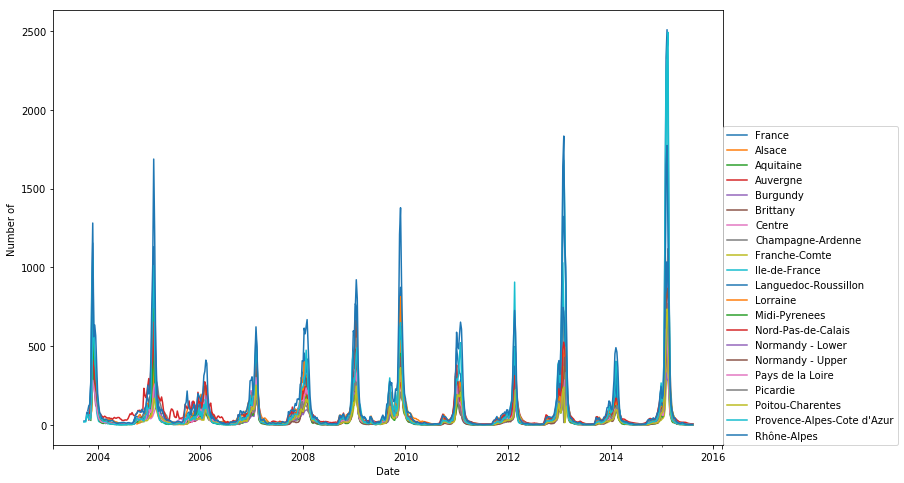

In [4]:
ax = ggle.plot()
ax.legend(loc=(1, 0))
fig = ax.get_figure()
fig.set_size_inches(12, 8)
ax.set(ylabel='Number of ')

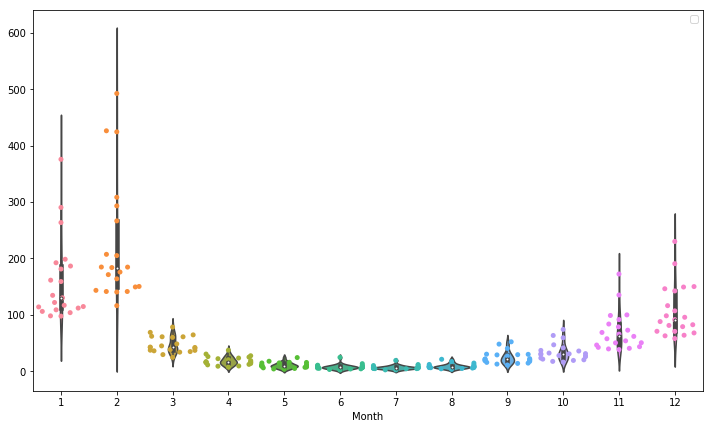

In [28]:
# I actually found a bug preparing this
# https://github.com/mwaskom/seaborn/issues/1438

monthly = ggle.groupby(ggle.index.month).mean()

fig, ax = plt.subplots()
sns.swarmplot(data=monthly.T, ax=ax)

sns.violinplot(data=monthly.T, ax=ax)
ax.set(xlabel='Month')
ax.legend(labels=[])
fig.set_size_inches(12, 7)

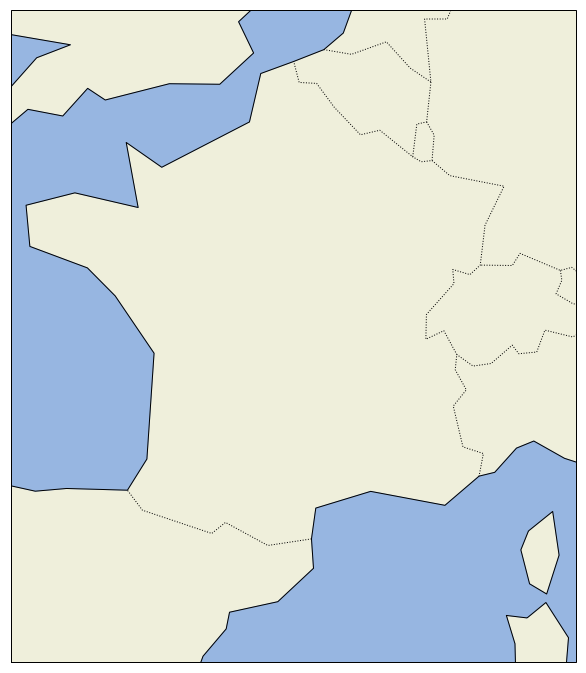

In [26]:


import cartopy.crs as ccrs

import cartopy.feature as cfeature
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-5, 10, 40, 52], crs=ccrs.Geodetic())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

fig.set_size_inches(12, 12)